<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/linearprog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lineární programování

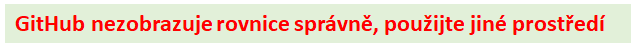

Lineární programování je matematická úloha, při které hledáme optimální řešení. Množina přípustných řešení (**feasible solutions**) je definována lineárními omezeními. Účelová funkce (**fitness function**) je lineární funkcí.

Matematickým vyjádřením je

$max\{c^Tx:Ax\le b\}$

https://www.youtube.com/watch?v=8IRrgDoV8Eo

https://math.feld.cvut.cz/bohata/oth/p6.pdf
http://labe.felk.cvut.cz/~tkrajnik/sdu/slides/slides9.pdf

https://www.youtube.com/watch?v=8IRrgDoV8Eo


## Kanonický tvar úlohy lineárního programování

$max\{c^Tx:Ax = b, x \le 0\}$

#### Příklad
$$f(x)=3x_1+2x_2 \to max$$
$$2x_1+x_2+x_3 = 100$$
$$x_1+x_2 + x_4 = 80$$
$$x_1 +x_5 = 40$$

$$x_1\ge 0, x_2\ge 0, x_3\ge 0, x_4\ge 0, x_5\ge 0$$

#### Maticový tvar
$$\begin{pmatrix}
2 & 1 & 1 & 0 & 0\\
1 & 1 & 0 & 1 & 0\\
1 & 0 & 0 & 0 & 1
\end{pmatrix} \cdot 
\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
x_5
\end{pmatrix} =
\begin{pmatrix}
100\\
80\\
40
\end{pmatrix}$$

## Převedení úlohy lineárního programování na kanonický tvar

### Úloha na maximum na úlohu na maximum (a naopak)

$min\{c^Tx:Ax\le b\}$

$max\{-c^Tx:Ax\le b\}$



#### Příklad
$$f(x)=x_1+3x_2 \to max$$
$$-2x_1+x_2\le 5$$
$$-3x_1+x_2=7$$
$$x_1\ge 0, x_2\ge 0$$



#### Řešení
$$f(x)=-x_1-3x_2 \to min$$
$$-2x_1+x_2\le 5$$
$$-3x_1+x_2=7$$
$$x_1\ge 0, x_2\ge 0$$

### Úloha s nerovnostmi na úlohu s rovnostmi

#### Příklad

$$f(x)=x_1+3x_2 \to max$$
$$-2x_1+x_2\le 5$$
$$-3x_1+x_2=7$$
$$x_1\ge 0, x_2\ge 0$$

#### Řešení
$$f(x)=x_1+3x_2 \to max$$
$$-2x_1+x_2+x_3= 5$$
$$-3x_1+x_2=7$$
$$x_1\ge 0, x_2\ge 0, x_3\ge 0$$



#### Maticový zápis
$$\begin{pmatrix}
-2 & 1 & 1\\
-3 & 1 & 0
\end{pmatrix} \cdot 
\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix} =
\begin{pmatrix}
5\\
7
\end{pmatrix}$$

#### Příklad
$$f(x)=x_1+x_2 \to min$$
$$x_1-x_2 \ge 1$$
$$x_1+2x_2 \ge 4$$
$$x_1\ge 0, x_2\ge 0$$

#### Řešení
$$f(x)=x_1+x_2 \to min$$
$$x_1-x_2 -x_3 = 1$$
$$x_1+2x_2 -x_4 = 4$$
$$x_1\ge 0, x_2\ge 0, x_3 \ge 0, x_4 \ge 0$$

### Chybějící podmínka nezápornosti u proměnné

#### Příklad

$$f(x)=x_1+3x_2 \to max$$
$$-2x_1+x_2\le 5$$
$$-3x_1+x_2=7$$
$$x_1\ge 0$$

#### Řešení

$$x_2=x_4-x_5$$
$$x_4 \ge 0, x_5 \ge 0$$

$$f(x)=x_1+3x_4-3x_5 \to max$$
$$-2x_1+x_4-x_5\le 5$$
$$-3x_1+x_4-x_5=7$$
$$x_1\ge 0, x_4 \ge 0, x_5 \ge 0$$

## Grafické znázornění

#### Příklad
$$f(x)=3x_1+2x_2 \to max$$
$$2x_1+x_2\le 100$$
$$x_1+x_2\le 80$$
$$x_1 \le 40$$
$$x_1\ge 0, x_2\ge 0$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotf2D(a1, a2, b, xmin=0, xmax=10, ymin=0, ymax=10, label = ''):
  # a1 * x1 + a2 * x2 = b
  def byx(x):
    result = (a1 * x - b) / (-a2)
    return result
  def byy(y):
    result = (a2 * y - b) / (-a1)
    return result

  if abs(a1) < abs(a2):
    x = np.linspace(xmin, xmax)
    y = byx(x)
    plt.plot(x, y, label=label)
  else:
    y = np.linspace(ymin, ymax)
    x = byy(y)
    plt.plot(x, y, label=label)

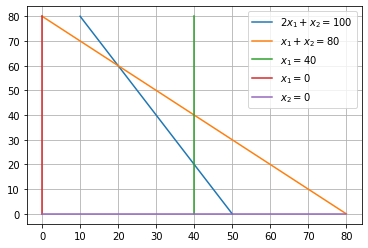

In [ ]:
plotf2D(2, 1, 100, xmax=80,ymax=80, label='$2x_1+x_2=100$')
plotf2D(1, 1, 80, xmax=80,ymax=80, label='$x_1+x_2=80$')
plotf2D(1, 0, 40, xmax=80,ymax=80, label='$x_1=40$')
plotf2D(1, 0, 0, xmax=80,ymax=80, label='$x_1=0$')
plotf2D(0, 1, 0, xmax=80,ymax=80, label='$x_2=0$')
plt.grid(which='both')
plt.legend()
#plt.gca()
plt.show()  

## Etapy řešení úlohy lineárního programování

### Jednotková matice v řešení

Je-li v matici $A$ jednotková submatice, lze přímo psát přípustné řešení.

#### Příklad
$$f(x)=3x_1+2x_2 \to max$$
$$2x_1+x_2+x_3 = 100$$
$$x_1+x_2 + x_4 = 80$$
$$x_1 +x_5 = 40$$
$$x_1\ge 0, x_2\ge 0, x_3\ge 0, x_4\ge 0, x_5\ge 0$$

#### Maticový zápis
$$\begin{pmatrix}
2 & 1 & 1 & 0 & 0\\
1 & 1 & 0 & 1 & 0\\
1 & 0 & 0 & 0 & 1
\end{pmatrix} \cdot 
\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
x_5
\end{pmatrix} =
\begin{pmatrix}
100\\
80\\
40
\end{pmatrix}$$

Přípustným řešením je

$$\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
x_5
\end{pmatrix} =
\begin{pmatrix}
0\\
0\\
100\\
80\\
40
\end{pmatrix}$$

Hodnota kriteriální funkce je
$$f(x)=0$$

## Jednotková matice v řešení není

Nelze tedy ihned psát přípustné řešení.

#### Příklad
$$f(x)=x_1+x_2 \to min$$
$$x_1-x_2 \ge 1$$
$$x_1+2x_2 \ge 4$$
$$x_1\ge 0, x_2\ge 0$$

#### Kanonický tvar
$$f(x)=x_1+x_2 \to min$$
$$x_1-x_2 -x_3 = 1$$
$$x_1+2x_2 -x_4 = 4$$
$$x_1\ge 0, x_2\ge 0, x_3 \ge 0, x_4 \ge 0$$

#### Maticový zápis
$$\begin{pmatrix}
1 & -1 & -1 & 0 \\
1 & 2 & 0 & -1\\
\end{pmatrix} \cdot 
\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4
\end{pmatrix} =
\begin{pmatrix}
1\\
4
\end{pmatrix}$$

#### Kanonický tvar II
$$f(x,u)=x_1+x_2 +Mu_5+Mu_6 \to min$$
$$x_1-x_2 -x_3 +u_5= 1$$
$$x_1+2x_2 -x_4 +u_6= 4$$
$$x_1\ge 0, x_2\ge 0, x_3 \ge 0, x_4 \ge 0, u_5 \ge 0, u_6 \ge 0$$

#### Maticový zápis II
$$\begin{pmatrix}
1 & -1 & -1 & 0 & 1 & 0\\
1 & 2 & 0 & -1 & 0 & 1\\
\end{pmatrix} \cdot 
\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
u_5\\
u_6
\end{pmatrix} =
\begin{pmatrix}
1\\
4
\end{pmatrix}$$

Přípustným řešením je 
$$\begin{pmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
u_5\\
u_6
\end{pmatrix} =
\begin{pmatrix}
0\\
0\\
0\\
0\\
1\\
4
\end{pmatrix}$$
Hodnota kriteriální funkce je
$$f(x,u)=M+4M=5M$$

## Vzorová úloha

### Zadání

$$f(x)=-8x_1-10x_2-7x_3 \to min$$
$$x_1+3x_2+2x_3 \le 10$$
$$-x_1-5x_2-x_3 \ge -8$$
$$x_1 \le 0, x_2 \le 0, x_3 \le 0$$

### Převedení na úlohu na maximum

$$f(x)=8x_1+10x_2+7x_3 \to max$$
$$x_1+3x_2+2x_3 \le 10$$
$$x_1+5x_2+x_3 \le 8$$
$$x_1 \le 0, x_2 \le 0, x_3 \le 0$$

### Odstranění nerovností

$$f(x)=8x_1+10x_2+7x_3 \to max$$
$$x_1+3x_2+2x_3+x_4 = 10$$
$$x_1+5x_2+x_3+x_5 = 8$$
$$x_1 \le 0, x_2 \le 0, x_3 \le 0, x_4 \le 0, x_5 \le 0$$

### Vytvoření simplexové tabulky

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$|
|:---:|:---:|:---:|:---:|:---:|:----:|:--:|
|  1  |  3  |  2  |  1  |  0  |      | 10 |
|  1  |  5  |  1  |  0  |  1  |      | 8  |
|  -8 | -10 |  -7 |  0  |  0  |      | 0  |

### Aktuální řešení přečtené ze simplexové tabulky 

$$x_1=0, x_2=0, x_3=0, x_4=10, x_5=8$$
$$f(x)=0$$

### Ověření optimality řešení

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$|
|:---:|:---:|:---:|:---:|:---:|:----:|:--:|
|  1  |  3  |  2  |  1  |  0  |      | 10 |
|  1  |  5  |  1  |  0  |  1  |      | 8  |
|  **-8** | **-10** |  **-7** |  0   |  0  |      | 0  |
| ⬆ | ⬆ |   ⬆  |     |     |      |    |
| záporná | záporná | záporná  |     |     |      |    |

Tučné hodnoty jsou záporné, jejich existence potvrzuje skutečnost, že je nutné provést další kroky k dosažení optimálního řešení.

### Nalezení proměnné jdoucí do báze

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$|
|:---:|:---:|:---:|:---:|:---:|:----:|:--:|
|  1  |  3  |  2  |  1  |  0  |      | 10 |
|  1  |  5  |  1  |  0  |  1  |      | 8  |
|  -8 | **-10** |  -7 |  0  |  0  |      | 0  |
|  | ⬆ |     |     |     |      |    |

Nejmenší záporná hodnota (-10) ukazuje proměnnou, která půjde do báze.


### Nalezení promměné, která bude v bázi nahrazena

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$| | | |
|:---:|:---:|:---:|:---:|:---:|:----:|:--:| | | |
|  1  |  3  |  2  |  1  |  0  |      | 10 | | $$\frac{10}{3}$$ | |
|  1  |  5  |  1  |  0  |  1  |      | 8  | | $$\frac{8}{5}$$ | ⬅ / nejmenší |
|  -8 | **-10** |  -7 |  0  |  0  |      | 0  | | | |

### Vytvoření nové tabulky / Předvyplnění "vybraného řádku"

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$| | | 
|:---:|:---:|:---:|:---:|:---:|:----:|:--:| | | 
|     |     |     |     |     |      |    | |  | 
|  1  |  5  |  1  |  0  |  1  |      | 8  | | $$\frac{8}{5}$$ | 
|     |     |     |     |     |      |    | | | 

### Vytvoření nové tabulky / Doplnění tabulky

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$| | 
|:---:|:---:|:---:|:---:|:---:|:----:|:--:| | 
|  $$\frac{2}{5}$$   |  0  | $$\frac{7}{5}$$  |  1   | $$-\frac{3}{5}$$ |      | $$\frac{26}{5}$$   | |   
|  $$\frac{1}{5}$$  |  1  |  $$\frac{1}{5}$$  |  0  |  $$\frac{1}{5}$$  |      | $$\frac{8}{5}$$  | | 
|   -6  | 0    |  -5   | 0    |  2   |       |  16  | | 

### Aktuální řešení přečtené ze simplexové tabulky 

$$x_1=0, x_2=\frac{8}{5}, x_3=0, x_4=\frac{26}{5}, x_5=0$$
$$f(x)=16$$

### Srovnání původní a nové tabulky

Původní

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$|
|:---:|:---:|:---:|:---:|:---:|:----:|:--:|
|  1  |  3  |  2  |  1  |  0  |      | 10 |
|  1  |  5  |  1  |  0  |  1  |      | 8  |
|  -8 | -10 |  -7 |  0  |  0  |      | 0  |

Nová

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$| | 
|:---:|:---:|:---:|:---:|:---:|:----:|:--:| | 
|  $$\frac{2}{5}$$   |  0  | $$\frac{7}{5}$$  |  1   | $$-\frac{3}{5}$$ |      | $$\frac{26}{5}$$   | |   
|  $$\frac{1}{5}$$  |  1  |  $$\frac{1}{5}$$  |  0  |  $$\frac{1}{5}$$  |      | $$\frac{8}{5}$$  | | 
|   -6  | 0    |  -5   | 0    |  2   |       |  16  | | 

### Ověření optimality řešení

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$| | 
|:---:|:---:|:---:|:---:|:---:|:----:|:--:| | 
|  $$\frac{2}{5}$$   |  0  | $$\frac{7}{5}$$  |  1   | $$-\frac{3}{5}$$ |      | $$\frac{26}{5}$$   | |   
|  $$\frac{1}{5}$$  |  1  |  $$\frac{1}{5}$$  |  0  |  $$\frac{1}{5}$$  |      | $$\frac{8}{5}$$  | | 
|   -6  | 0    |  -5   | 0    |  2   |       |  16  | | 
|    ⬆ <br/>nejmenší  |      |       |      |      |       |      |


### Identifikace proměnné jdoucí z báze

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$| | |
|:---:|:---:|:---:|:---:|:---:|:----:|:--:| | |
|  $$\frac{2}{5}$$   |  0  | $$\frac{7}{5}$$  |  1   | $$-\frac{3}{5}$$ |      | $$\frac{26}{5}$$   | |   $$\frac{\frac{26}{5}}{\frac{2}{5}}=13$$|
|  $$\frac{1}{5}$$  |  1  |  $$\frac{1}{5}$$  |  0  |  $$\frac{1}{5}$$  |      | $$\frac{8}{5}$$  | | $$\frac{\frac{8}{5}}{\frac{1}{5}}=8$$|
|   -6  | 0    |  -5   | 0    |  2   |       |  16  | | |
|    ⬆ <br/>nejmenší  |      |       |      |      |       |      ||

### Vytvoření nové tabulky / Předvyplnění řádku

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$ |||
|:---:|:---:|:---:|:---:|:---:|:------:|:--:|||
|     |     |     |     |     |        |    |||
|  1  |  5  |  1  |  0  |  1  |        | 8  |||
|     |     |     |     |     |        |    |||

### Vytvoření nové tabulky / Doplnění tabulky

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$| |$b$ |||
|:---:|:---:|:---:|:---:|:---:|:------:|:--:|||
|  0  |  -2 |  1  |  1  |  -1 |        | 2  |||
|  1  |  5  |  1  |  0  |  1  |        | 8  |||
|  0  |  30 |  1  |  0  |  8  |        | 64 |||

### Aktuální řešení přečtené ze simplexové tabulky

$$x_1=8, x_2=0, x_3=0, x_4=1, x_5=0$$
$$f(x)=64$$

### Řešení původní úlohy

$$f(x)=-8x_1-10x_2-7x_3 \to min$$
$$x_1+3x_2+2x_3 \le 10$$
$$-x_1-5x_2-x_3 \ge -8$$
$$x_1 \le 0, x_2 \le 0, x_3 \le 0$$
Přečtené ze simplexové tabulky
$$x_1=8, x_2=0, x_3=0$$
$$f(x)=-64$$

## Duální úloha lineárního programování

# Python

## Použití Pythonu při řešení úlohy LP

### Příklad
$$f(x)=4x_1+10x_2 \to min$$
$$x_1+x_2 \le 3$$
$$2x_1+5x_2 = 12$$
$$x_1 \ge 0, x_2 \ge 0$$

### Knihovna ```scipy```

In [ ]:
from scipy.optimize import linprog as lp

In [ ]:
c = [4, 10]
Ane = [[1, 1]]
bne = [3]
Ae = [[2, 5]]
be = [12]
result = lp(c=c, A_ub=Ane, b_ub=bne, A_eq=Ae, b_eq=be, bounds=((0, None), (0, None)), method='simplex')
print(f'Solution found at {result.x} where f(x) = {result.fun}. That\'s {result.success}.')
print(result)

Solution found? at [0.  2.4] where f(x) = 24.0. That's True.
     con: array([0.])
     fun: 24.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.6])
  status: 0
 success: True
       x: array([0. , 2.4])


### Knihovna ```pulp```

In [ ]:
!pip install pulp

     |████████████████████████████████| 40.6MB 94kB/s 


In [ ]:
from pulp import *
prob = LpProblem("School problem", LpMinimize)
x1 = LpVariable("x1", 0, 1000)
x2 = LpVariable("x2", 0, 1000)
prob += (x1 + x2 <= 3)
prob += (2 * x1 + 5 * x2 == 12)
prob += (4 * x1 + 10 * x2)
status = prob.solve()

print(f'x1={value(x1)}, x2={value(x2)}')
print(LpStatus[status])

x1=0.0, x2=2.4
Optimal


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1195: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


## Příklady

### Příklad
$$f(x)=5x_1+6x_2 \to min$$
$$x_1+2x_2 \ge 10$$
$$2x_1+3x_2 \ge 17$$
$$x_1 \ge 0, x_2 \ge 0$$

### Řešení

### Příklad
$$f(x)=3x_1+5x_2 \to min$$
$$x_1+2x_2 \ge 10$$
$$2x_1+3x_2 \ge 17$$
$$x_1 \ge 0, x_2 \ge 0$$

### Řešení

### Příklad
$$f(x)=4x_1+10x_2 \to min$$
$$x_1+x_2 \le 3$$
$$2x_1+5x_2 = 12$$
$$x_1 \ge 0, x_2 \ge 0$$

### Řešení

### Příklad 1

Surový materiál je dodáván v délce 7 m. Požadavek je produkovat délky 2.3 m (A), 1.9 m (B) a 0.8 m (C) v počtech A 60 ks, B 90 ks a C 320 ks. Stanovte minimální počet kusů surového materiálu.

In [ ]:
delkaZdroje = 7
delkyVysledku = (2.3, 1.9, 0.8) 
poctyVysledku = (60, 90, 320)

In [ ]:
def cutIt(source, results):
  '''
  Pocita mozne rozrezani materialu, 
  zdrojovy material je source, results cilove delky
  '''
  
  noyield = True # zadny vysledek nebyl vygenerovan
  for current in results:
    
    if current <= source: # rez lze provest jen tehdy, pokud je surovina delsi nez vysledek
      
      # zjistime mozne rezy ze zbytku
      for cutting in cutIt(source - current, results):
        if len(cutting) == 0:
          # rez je "nerez", vracena prazdna konfigurace
          noyield = False
          yield [current] # vysledna konfigurace rezu tedy obsahuje jen jeden prvek
          continue
        if current >= max(cutting):
          # vraceny cutting je serazen podle velikost, tedy zastupuje vsechny ekvivalentni kombinace 
          noyield = False
          yield [current, *cutting]
  if noyield:
    # zadna konfigurace rezu nebyla vracena, musime vratit prazdnou konfiguraci
    yield []

for index, possibleCut in enumerate(cutIt(delkaZdroje, delkyVysledku)):
  print(index, '.\tcut:', possibleCut, '\tΣ', sum(possibleCut))

0 .	cut: [2.3, 2.3, 2.3] 	Σ 6.8999999999999995
1 .	cut: [2.3, 2.3, 1.9] 	Σ 6.5
2 .	cut: [2.3, 2.3, 0.8, 0.8, 0.8] 	Σ 6.999999999999999
3 .	cut: [2.3, 1.9, 1.9, 0.8] 	Σ 6.8999999999999995
4 .	cut: [2.3, 1.9, 0.8, 0.8, 0.8] 	Σ 6.599999999999999
5 .	cut: [2.3, 0.8, 0.8, 0.8, 0.8, 0.8] 	Σ 6.299999999999999
6 .	cut: [1.9, 1.9, 1.9, 0.8] 	Σ 6.499999999999999
7 .	cut: [1.9, 1.9, 0.8, 0.8, 0.8] 	Σ 6.199999999999999
8 .	cut: [1.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8] 	Σ 6.699999999999999
9 .	cut: [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8] 	Σ 6.3999999999999995


In [ ]:
def countIt(configuration, results):
  result = {}
  for item in results:
    result[item] = 0
  for item in configuration:
    result[item] += 1
  return result

def countAll(configurations, results):
  for configuration in configurations:
    yield countIt(configuration, results)

variants = list(countAll(cutIt(delkaZdroje, delkyVysledku), delkyVysledku))

for index, possibleCut in enumerate(variants):
  print(index, '.\tcut:', possibleCut, '\tΣ', sum(map(lambda x: x[0] * x[1], possibleCut.items())))

0 .	cut: {2.3: 3, 1.9: 0, 0.8: 0} 	Σ 6.8999999999999995
1 .	cut: {2.3: 2, 1.9: 1, 0.8: 0} 	Σ 6.5
2 .	cut: {2.3: 2, 1.9: 0, 0.8: 3} 	Σ 7.0
3 .	cut: {2.3: 1, 1.9: 2, 0.8: 1} 	Σ 6.8999999999999995
4 .	cut: {2.3: 1, 1.9: 1, 0.8: 3} 	Σ 6.6
5 .	cut: {2.3: 1, 1.9: 0, 0.8: 5} 	Σ 6.3
6 .	cut: {2.3: 0, 1.9: 3, 0.8: 1} 	Σ 6.499999999999999
7 .	cut: {2.3: 0, 1.9: 2, 0.8: 3} 	Σ 6.2
8 .	cut: {2.3: 0, 1.9: 1, 0.8: 6} 	Σ 6.700000000000001
9 .	cut: {2.3: 0, 1.9: 0, 0.8: 8} 	Σ 6.4


In [ ]:
for result, count in zip(delkyVysledku, poctyVysledku):
  for index, variant in enumerate(variants):
    if (variant[result] == 0):
      print('\t\t', end='')
    else:
      print('\t + ', variant[result], ' * x', index, sep='', end='')
  print('\t >=', count)
  
for index, variant in enumerate(variants):
  print(' + x', index, sep='', end='')
print(' -> min')


	 + 3 * x0	 + 2 * x1	 + 2 * x2	 + 1 * x3	 + 1 * x4	 + 1 * x5									 >= 60
			 + 1 * x1			 + 2 * x3	 + 1 * x4			 + 3 * x6	 + 2 * x7	 + 1 * x8			 >= 90
					 + 3 * x2	 + 1 * x3	 + 3 * x4	 + 5 * x5	 + 1 * x6	 + 3 * x7	 + 6 * x8	 + 8 * x9	 >= 320
 + x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 -> min


In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html
from scipy.optimize import linprog
c = [1] * len(variants)
bounds=[(0, None)] * len(variants)
Ax = [0] * len(variants)
A = [[*Ax] for item in delkyVysledku]
print(A)
for i, result, count in zip(range(1000), delkyVysledku, poctyVysledku):
  for j, variant in enumerate(variants):
    A[i][j] = -variant[result]

b = [-value for value in delkyVysledku]

print(A)
print(b)
print(c)
print(bounds)
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='revised simplex')
print(res)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[-3, -2, -2, -1, -1, -1, 0, 0, 0, 0], [0, -1, 0, -2, -1, 0, -3, -2, -1, 0], [0, 0, -3, -1, -3, -5, -1, -3, -6, -8]]
[-2.3, -1.9, -0.8]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
     con: array([], dtype=float64)
     fun: 1.26875
 message: 'The problem is unbounded, as the simplex algorithm found a basic feasible solution from which there is a direction with negative reduced cost in which all decision variables increase.'
     nit: 5
   slack: array([0.00000000e+00, 4.44089210e-16, 2.22044605e-16])
  status: 3
 success: False
       x: array([ 0.     ,  0.     ,  0.     ,  2.3    ,  0.     ,  0.     ,
        0.     , -1.35   ,  0.     ,  0.31875])


In [ ]:
c = [-1, 4, 1]
A = [[-3, 1, 1], [1, 2, 1]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)
x2_bounds = (None, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds], method='revised simplex')
print(res)

     con: array([], dtype=float64)
     fun: -22.0
 message: 'The problem is unbounded, as the simplex algorithm found a basic feasible solution from which there is a direction with negative reduced cost in which all decision variables increase.'
     nit: 1
   slack: array([39.,  0.])
  status: 3
 success: False
       x: array([10., -3.,  0.])


In [ ]:
def check(a1, x1, a2, x2, relation = 'eq', b = 0): 
  leftside = a1 * x1 + a2 * x2
  result = false
  if relation == 'eq':
    result = leftside == b
  elif relation == 'le':
    result = leftside <= b
  elif relation == 'qe':
    result = leftside >= b
  return result

def plotline(a1, x1, a2, x2, b, xmin, xmax, ymin, ymax):
  xx = []
  yy = []
  def include(xp, yp):
    if check(a1, x1, a2, x2, b = b):
      xx.append(xp)
      yy.append(yp)
  
  include(xmin, ymin)
  include(xmax, ymin)
  include(xmax, ymax)
  include(xmin, ymax)
  include(xmin, ymin)


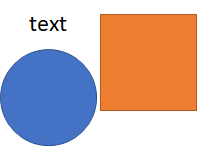